In [2]:
import pickle
# write to Pickle
#pickle.dump(docs, open( "YbEr_docs_for_population.pkl", "wb" ) ) # docs for the spectrum in the workflow (large size)
#pickle.dump(spectrum_data, open( "YbEr_spectum.pkl", "wb" ) ) # x-y spectrum data for the workflow

# read from Pickle

docs = pickle.load( open( "YbEr_docs_for_population.pkl", "rb" ) ) # docs for the spectrum in the workflow (large size)

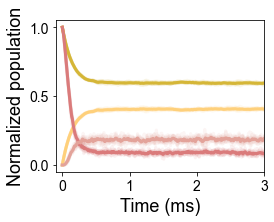

In [3]:
color = ['#D5B637', '#E3A39A','#78ACA8', '#E7E7E7', '#20425B']

plt.rcParams["font.family"] = "arial"
FontSize = 18
ticksize = 14

fig, axs = plt.subplots(1, 1, figsize=(4,3), tight_layout=True)
axs.set_prop_cycle(cycler(color=['#D5B637', '#E3A39A','#78ACA8', '#E7E7E7', '#20425B']))


dopants = [Dopant(key, val) for key, val in docs[0]['data']['overall_dopant_concentration'].items()]
sk = SpectralKinetics(dopants)

population_threshold = 0.0001#0.015
n_samples = 8
mycolor = cycler(color=['#D5B637', '#fed07b', '#da7b7b', '#E3A39A'])
x_list, y_list = get_populations_from_docs(docs)
#levels_to_plot = np.where(np.mean([np.mean(y, axis=0) for y in  y_list], axis=0)> population_threshold)[0]
levels_to_plot = [0,1,2,6]
i = 0
for x, y in zip(x_list[:n_samples], y_list[:n_samples]):
    plt.gca().set_prop_cycle(mycolor)
    plt.plot(x*1000, y[:, levels_to_plot], linewidth=3, alpha=0.1)
    i+=1
    #plt.scatter(x*1000, y[:, levels_to_plot[0]], alpha=0.15)

x, y = average_trajectory_populations(x_list[:n_samples], y_list[:n_samples])

plt.gca().set_prop_cycle(mycolor)
plt.plot(x*1000, y[:, levels_to_plot], linewidth=3, alpha = 1)

# custom_lines = []
# labels = []
# for n, i in enumerate(levels_to_plot):
#     species_name = combined_energy_level_to_specie_name(sk, i)
#     species_level = combined_energy_level_to_specie_energy_level(sk, i)
#     custom_lines.append(Line2D([0], [0], color=cm.tab10(n), lw=2))
#     labels.append(f'{species_name} - level {species_level}')
# plt.legend(custom_lines, labels, loc='right', bbox_to_anchor=[1.3, 0.5])

plt.xlim([-0.1,3])
plt.locator_params(axis='y', nbins=4)
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)

plt.xlabel('Time (ms)', fontsize = FontSize)
plt.ylabel('Normalized population', fontsize = FontSize)
plt.savefig('time_resolved_population_0809.pdf') 
plt.show()